# LIMPIEZA I 15/8

HIPÓTESIS:

1. La edad, el trabajo, el estado civil, la educación, la situación de deuda y la forma de contacto pueden influir en la probabilidad de que un cliente acepte la oferta.

2. El número de veces que se ha contactado a un cliente en el pasado (campo campaign), el número de días que han pasado desde el último contacto (campo pdays), y el resultado de la campaña anterior (campo poutcome) pueden afectar la respuesta del cliente a una nueva oferta.

3. Las variables económicas (tales como el índice de precios al consumidor (cons.price.idx), la tasa de variación del empleo (emp.var.rate), etc.) pueden influir en la probabilidad de que un cliente acepte la oferta.

4. Los clientes que ya tienen una hipoteca (housing) o un préstamo (loan) pueden ser menos propensos a aceptar una nueva oferta, ya que podrían estar limitados financieramente.

TAREAS:

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("data/bank_additional_full.csv", index_col = 0)
df.head(2)

,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,month_day_week
0,56.0,housemaid,MARRIED,NaN,0.0,0.0,0.0,telephone,261,1.0,999,0,NONEXISTENT,NaN,"93,994","-36,4","4,857","5191,0",no,"['may', 'mon']"
1,NaN,services,MARRIED,NaN,NaN,0.0,NaN,telephone,149,1.0,999,0,NONEXISTENT,NaN,"93,994","-36,4","4,857","5191,0",no,"['may', 'mon']"


In [3]:
pd.options.display.max_columns = None
df.head()

,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,month_day_week
0,56.0,housemaid,MARRIED,NaN,0.0,0.0,0.0,telephone,261,1.0,999,0,NONEXISTENT,NaN,"93,994","-36,4","4,857","5191,0",no,"['may', 'mon']"
1,NaN,services,MARRIED,NaN,NaN,0.0,NaN,telephone,149,1.0,999,0,NONEXISTENT,NaN,"93,994","-36,4","4,857","5191,0",no,"['may', 'mon']"
2,37.0,services,MARRIED,high.school,0.0,1.0,0.0,telephone,226,1.0,999,0,NONEXISTENT,1.1,"93,994","-36,4","4,857","5191,0",NaN,"['may', 'mon']"
3,40.0,NaN,MARRIED,basic.6y,0.0,0.0,0.0,telephone,151,1.0,999,0,NONEXISTENT,1.1,"93,994","-36,4","4,857","5191,0",no,"['may', 'mon']"
4,56.0,services,NaN,NaN,0.0,0.0,1.0,telephone,307,1.0,999,0,NONEXISTENT,1.1,NaN,"-36,4","4,857","5191,0",no,"['may', 'mon']"


In [4]:
df.isnull().sum()

age                4701
job                4989
marital            8882
education         15016
default            9016
housing            1031
loan               9656
contact               0
duration              0
campaign            466
pdays                 0
previous              0
poutcome              0
emp.var.rate      13756
cons.price.idx     4679
cons.conf.idx         0
euribor3m             0
nr.employed           0
y                 13742
month_day_week        0
dtype: int64

1. Explora el dataset con los métodos que hemos ido aprendiendo hasta ahora para familiarizarnos con los datos.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43170 entries, 0 to 29612
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             38469 non-null  float64
 1   job             38181 non-null  object 
 2   marital         34288 non-null  object 
 3   education       28154 non-null  object 
 4   default         34154 non-null  float64
 5   housing         42139 non-null  float64
 6   loan            33514 non-null  float64
 7   contact         43170 non-null  object 
 8   duration        43170 non-null  int64  
 9   campaign        42704 non-null  float64
 10  pdays           43170 non-null  int64  
 11  previous        43170 non-null  int64  
 12  poutcome        43170 non-null  object 
 13  emp.var.rate    29414 non-null  float64
 14  cons.price.idx  38491 non-null  object 
 15  cons.conf.idx   43170 non-null  object 
 16  euribor3m       43170 non-null  object 
 17  nr.employed     43170 non-null  obje

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,38469.0,39.975643,10.364454,17.0,32.0,38.0,47.0,98.0
default,34154.0,0.000088,0.009372,0.0,0.0,0.0,0.0,1.0
housing,42139.0,0.535869,0.498718,0.0,0.0,1.0,1.0,1.0
loan,33514.0,0.155696,0.362572,0.0,0.0,0.0,0.0,1.0
duration,43170.0,257.883739,259.393738,0.0,102.0,179.0,319.0,4918.0
campaign,42704.0,2.564912,2.773803,1.0,1.0,2.0,3.0,56.0
pdays,43170.0,962.452282,186.962379,0.0,999.0,999.0,999.0,999.0
previous,43170.0,0.173639,0.496750,0.0,0.0,0.0,0.0,7.0
emp.var.rate,29414.0,0.079200,1.574900,-3.4,-1.8,1.1,1.4,1.4


2. Cambia el nombre de las columnas para que no tengan puntos en el nombre. En concreto, reemplazad los "." por comas.

In [7]:
nuevas_columnas = {col: col.replace(".", ",") for col in df.columns}
nuevas_columnas

{'age': 'age',
 'job': 'job',
 'marital': 'marital',
 'education': 'education',
 'default': 'default',
 'housing': 'housing',
 'loan': 'loan',
 'contact': 'contact',
 'duration': 'duration',
 'campaign': 'campaign',
 'pdays': 'pdays',
 'previous': 'previous',
 'poutcome': 'poutcome',
 'emp.var.rate': 'emp,var,rate',
 'cons.price.idx': 'cons,price,idx',
 'cons.conf.idx': 'cons,conf,idx',
 'euribor3m': 'euribor3m',
 'nr.employed': 'nr,employed',
 'y': 'y',
 'month_day_week': 'month_day_week'}

In [8]:
df.rename(columns = nuevas_columnas, inplace = True)
df.head(8)

,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,"emp,var,rate","cons,price,idx","cons,conf,idx",euribor3m,"nr,employed",y,month_day_week
0,56.0,housemaid,MARRIED,NaN,0.0,0.0,0.0,telephone,261,1.0,999,0,NONEXISTENT,NaN,"93,994","-36,4","4,857","5191,0",no,"['may', 'mon']"
1,NaN,services,MARRIED,NaN,NaN,0.0,NaN,telephone,149,1.0,999,0,NONEXISTENT,NaN,"93,994","-36,4","4,857","5191,0",no,"['may', 'mon']"
2,37.0,services,MARRIED,high.school,0.0,1.0,0.0,telephone,226,1.0,999,0,NONEXISTENT,1.1,"93,994","-36,4","4,857","5191,0",NaN,"['may', 'mon']"
3,40.0,NaN,MARRIED,basic.6y,0.0,0.0,0.0,telephone,151,1.0,999,0,NONEXISTENT,1.1,"93,994","-36,4","4,857","5191,0",no,"['may', 'mon']"
4,56.0,services,NaN,NaN,0.0,0.0,1.0,telephone,307,1.0,999,0,NONEXISTENT,1.1,NaN,"-36,4","4,857","5191,0",no,"['may', 'mon']"
5,45.0,services,MARRIED,basic.9y,NaN,0.0,0.0,telephone,198,1.0,999,0,NONEXISTENT,1.1,"93,994","-36,4","4,857","5191,0",NaN,"['may', 'mon']"
6,59.0,admin.,MARRIED,professional.course,0.0,0.0,0.0,telephone,139,1.0,999,0,NONEXISTENT,1.1,NaN,"-36,4","4,857","5191,0",no,"['may', 'mon']"
7,41.0,blue-collar,MARRIED,NaN,NaN,0.0,0.0,telephone,217,1.0,999,0,NONEXISTENT,1.1,"93,994","-36,4","4,857","5191,0",no,"['may', 'mon']"


In [9]:
df[["poutcome","contact"]].value_counts()

poutcome     contact  
NONEXISTENT  cellular     21955
             telephone    15306
FAILURE      cellular      4152
SUCCESS      cellular      1331
FAILURE      telephone      320
SUCCESS      telephone      106
Name: count, dtype: int64

In [10]:
df["pdays"].value_counts()

pdays
999    41581
3        458
6        428
4        121
9         67
7         66
2         63
12        61
10        55
5         50
13        38
11        30
1         26
15        26
14        22
8         20
0         15
16        13
17        10
18         7
22         4
19         3
21         2
25         1
26         1
27         1
20         1
Name: count, dtype: int64

3. ¿Hay valores duplicados en nuestro dataframe? En caso de que los haya, eliminándlos.

In [11]:
df.duplicated().sum()

1984

In [12]:
df.drop_duplicates(inplace = True)
df.reset_index(inplace=True)

In [13]:
df.duplicated().sum()

0

In [14]:
#duplicados = df.duplicated().sum()
#print(f"Valores duplicados: {duplicados}")
#if duplicados > 0:
#    df.drop_duplicates(inplace = True)

4. Como hemos visto, algunas columnas no tienen el tipo de datos que deberían. Cambiad el tipo de dato para las columnas de cons.price.idx, cons.conf.idx, euribor3m, nr.employed.

In [15]:
df[["cons,price,idx", "cons,conf,idx", "euribor3m", "nr,employed"]].head()

,"cons,price,idx","cons,conf,idx",euribor3m,"nr,employed"
0,"93,994","-36,4","4,857","5191,0"
1,"93,994","-36,4","4,857","5191,0"
2,"93,994","-36,4","4,857","5191,0"
3,"93,994","-36,4","4,857","5191,0"
4,NaN,"-36,4","4,857","5191,0"


In [16]:
df.dtypes

index               int64
age               float64
job                object
marital            object
education          object
default           float64
housing           float64
loan              float64
contact            object
duration            int64
campaign          float64
pdays               int64
previous            int64
poutcome           object
emp,var,rate      float64
cons,price,idx     object
cons,conf,idx      object
euribor3m          object
nr,employed        object
y                  object
month_day_week     object
dtype: object

In [17]:
df[["cons,price,idx", 'cons,conf,idx', 'euribor3m', 'nr,employed']] = df[["cons,price,idx", 'cons,conf,idx', 'euribor3m', 'nr,employed']].replace(r',', ".", regex=True)
df[["cons,price,idx", "cons,conf,idx", "euribor3m", "nr,employed"]].head()

,"cons,price,idx","cons,conf,idx",euribor3m,"nr,employed"
0,93.994,-36.4,4.857,5191.0
1,93.994,-36.4,4.857,5191.0
2,93.994,-36.4,4.857,5191.0
3,93.994,-36.4,4.857,5191.0
4,NaN,-36.4,4.857,5191.0


In [18]:
df = df.astype({"cons,price,idx":'float64', "cons,conf,idx": 'float64', "euribor3m":'float64', "nr,employed": 'float64'}, copy=True, errors ='raise')

In [19]:
df[["cons,price,idx", "cons,conf,idx", "euribor3m", "nr,employed"]].dtypes

cons,price,idx    float64
cons,conf,idx     float64
euribor3m         float64
nr,employed       float64
dtype: object

5. En las columnas de marital y month, poner todos los valores en minúsculas.
💡 Pista Podréis usar una función o una lambda 💡

In [20]:
df['marital'] = df['marital'].str.lower()
df['month_day_week'] = df['month_day_week'].str.lower()

In [21]:
df[['marital','month_day_week']].sample(3)

,marital,month_day_week
25610,NaN,"['nov', 'wed']"
35992,NaN,"['may', 'tue']"
39296,married,"['mar', 'tue']"


6. Para no olvidarnos de la visualización. A través de la visualización, podemos detectar errores, valores atípicos, valores faltantes y otros problemas comunes en los datos que de otra manera podrían ser difíciles de identificar. Para esto vamos a hacer una serie de gráficas que deberán ser incluidas en un subplot. Estas gráficas tienen que ser:

- Una gráfica donde podamos ver si el tipo de trabajo afecta a que un cliente acepte la oferta.

In [22]:
df[["job","poutcome"]].value_counts()

job            poutcome   
admin.         NONEXISTENT    7969
blue-collar    NONEXISTENT    7403
technician     NONEXISTENT    5297
services       NONEXISTENT    3072
management     NONEXISTENT    2254
retired        NONEXISTENT    1191
entrepreneur   NONEXISTENT    1134
self-employed  NONEXISTENT    1125
admin.         FAILURE         997
housemaid      NONEXISTENT     844
blue-collar    FAILURE         787
unemployed     NONEXISTENT     770
technician     FAILURE         559
student        NONEXISTENT     520
services       FAILURE         408
admin.         SUCCESS         380
management     FAILURE         300
retired        FAILURE         202
technician     SUCCESS         186
retired        SUCCESS         147
student        FAILURE         138
entrepreneur   FAILURE         129
self-employed  FAILURE         125
blue-collar    SUCCESS         112
student        SUCCESS         106
management     SUCCESS          86
unemployed     FAILURE          84
housemaid      FAILURE      

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

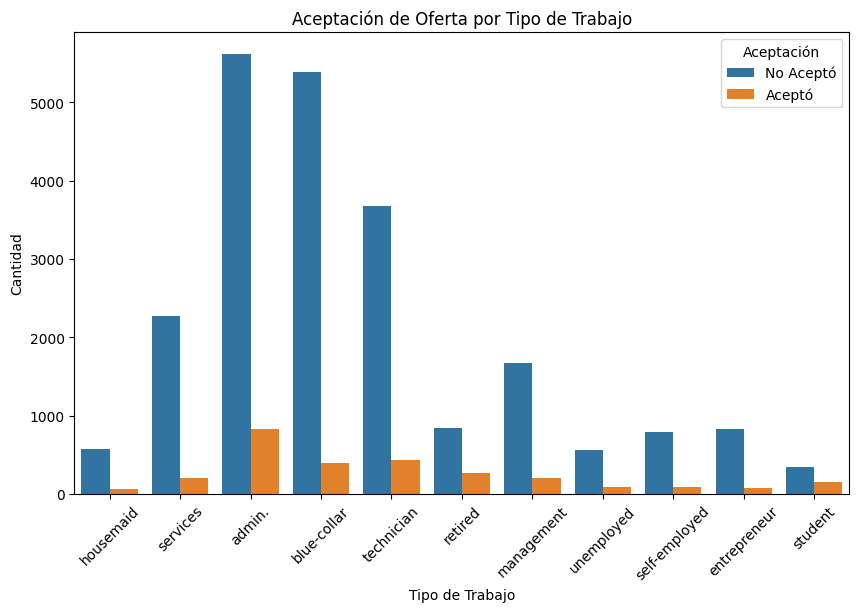

In [24]:
plt.figure(figsize=(10, 6))
sns.countplot(x='job', hue='y', data=df)
plt.title('Aceptación de Oferta por Tipo de Trabajo')
plt.xlabel('Tipo de Trabajo')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.legend(title='Aceptación', labels=['No Aceptó', 'Aceptó'])
plt.show()

- Una gráfica donde podamos ver si el hecho de que un cliente tenga una hipoteca afecta a que acepte la oferta.

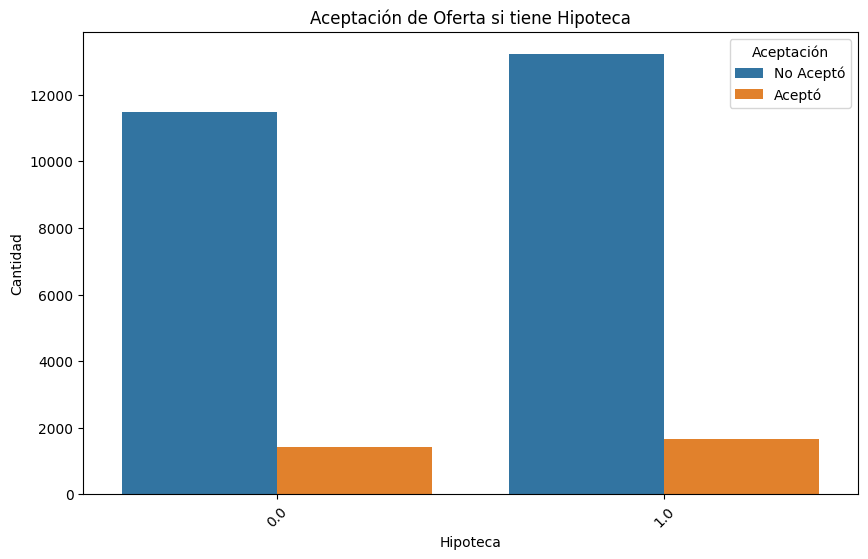

In [25]:
plt.figure(figsize=(10, 6))
sns.countplot(x='housing', hue='y', data=df)
plt.title('Aceptación de Oferta si tiene Hipoteca')
plt.xlabel('Hipoteca')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.legend(title='Aceptación', labels=['No Aceptó', 'Aceptó'])
plt.show()

- Una gráfica donde podamos ver si el hecho de que un cliente tenga un prestamo afecta a que acepte la oferta.

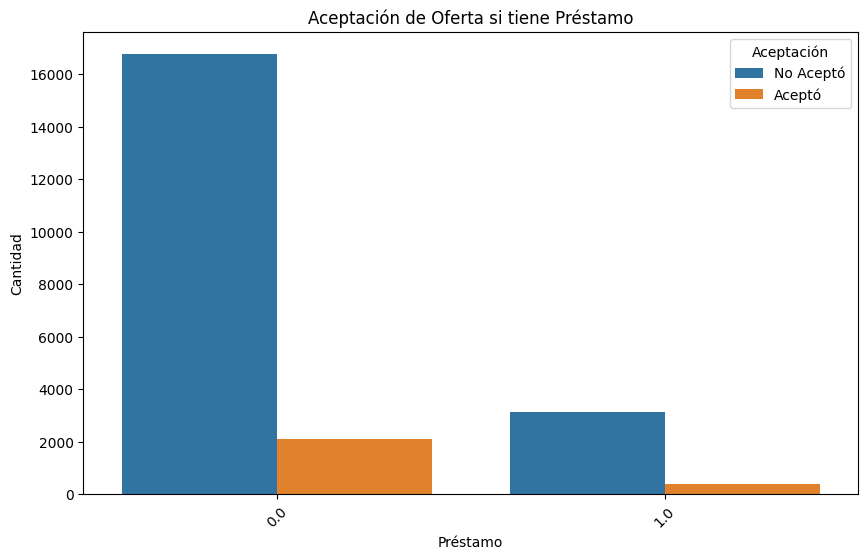

In [26]:
plt.figure(figsize=(10, 6))
sns.countplot(x='loan', hue='y', data=df)
plt.title('Aceptación de Oferta si tiene Préstamo')
plt.xlabel('Préstamo')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.legend(title='Aceptación', labels=['No Aceptó', 'Aceptó'])
plt.show()

- Una gráfica donde podamos ver si hay una relación entre el numero de días desde el último contacto afecta a que un cliente acepte la oferta

In [27]:
# df[["y","pdays"]]
df[["pdays","y"]].value_counts()

pdays  y  
999    no     24903
       yes     2484
6      yes      203
3      yes      196
       no        97
6      no        84
4      no        38
       yes       36
7      yes       30
9      no        26
10     yes       25
9      yes       25
2      yes       24
12     no        21
7      no        19
5      yes       19
13     yes       18
12     yes       16
10     no        15
1      no        14
2      no        14
15     yes       13
11     no        12
5      no        12
11     yes       10
0      yes        8
14     yes        8
8      yes        8
13     no         7
14     no         7
15     no         6
16     yes        5
17     no         5
1      yes        4
16     no         4
8      no         3
21     yes        2
0      no         2
18     yes        2
       no         2
19     no         1
       yes        1
20     no         1
22     no         1
       yes        1
26     yes        1
27     yes        1
17     yes        1
Name: count, dtype: int64

/home/andrea/anaconda3/envs/adalabenv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 800x400 with 0 Axes>

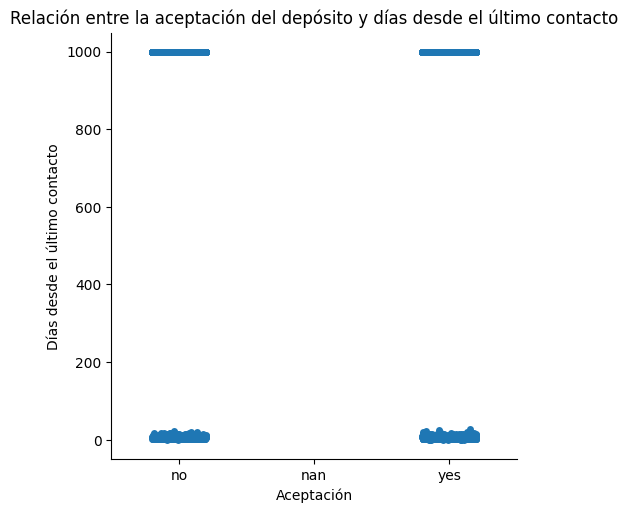

In [28]:
plt.figure(figsize =(8,4))

# usamos el swarmplot para visualizar nuestra pregunta
fig = sns.catplot(x='y', y = 'pdays' ,data = df)

# ponemos nombre a los ejes
fig.set(xlabel='Aceptación', ylabel= 'Días desde el último contacto' )

# ponemos título a la gráfica
plt.title('Relación entre la aceptación del depósito y días desde el último contacto')

# mostramos la gráfica
plt.show()

/home/andrea/anaconda3/envs/adalabenv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 800x400 with 0 Axes>

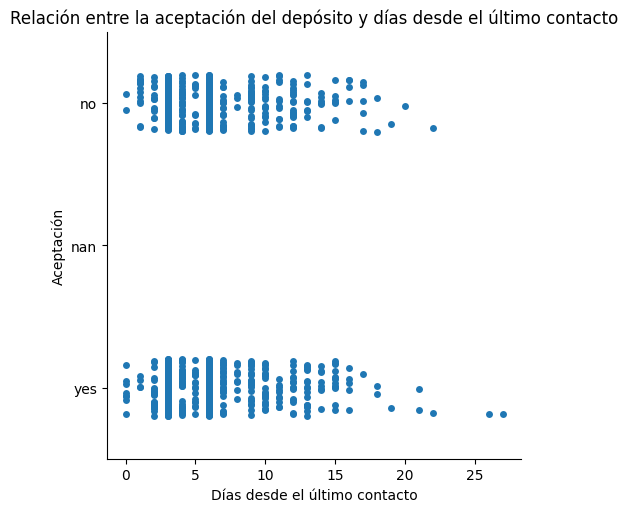

In [29]:
df2 = df.drop(df[df["pdays"] == 999].index)

plt.figure(figsize =(8,4))

# usamos el swarmplot para visualizar nuestra pregunta
fig = sns.catplot(x='pdays', y = 'y' ,data = df2)

# ponemos nombre a los ejes
fig.set(ylabel='Aceptación', xlabel= 'Días desde el último contacto' )

# ponemos título a la gráfica
plt.title('Relación entre la aceptación del depósito y días desde el último contacto')

# mostramos la gráfica
plt.show()

- Una gráfica donde podamos ver si hay relación entre el resultado de la campaña anterior y si el cliente afecta a que el cliente acepte la oferta.

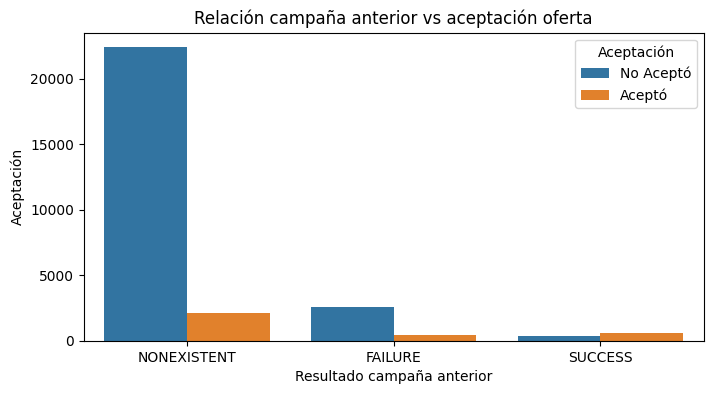

In [30]:
plt.figure(figsize =(8,4))

# iniciamos nuestra gráfica para contestar a la pregunta
fig = sns.countplot(x='poutcome', hue = "y", data = df)

# cambiamos el nombre de los ejes
fig.set(xlabel='Resultado campaña anterior', ylabel= 'Aceptación' )

# cambiamos el título de la gráfica
fig.set_title('Relación campaña anterior vs aceptación oferta')

plt.legend(title='Aceptación', labels=['No Aceptó', 'Aceptó'])

# motramos la gráfica
plt.show()

7. Guardamos el csv para seguir trabajando en el siguiente ejercicio de pair de limpieza

In [31]:
df.to_csv("data/pair1_bank_additional_full.csv")